ЗАДАНИЕ ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #1
 
1. Загрузите изображение в оттенках серого sar_1_gray.jpg
 


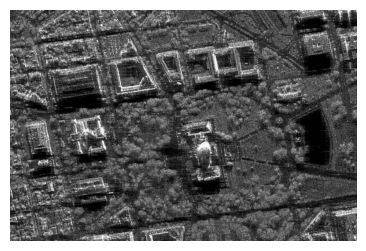

 
 
2. Постройте гистограмму
 


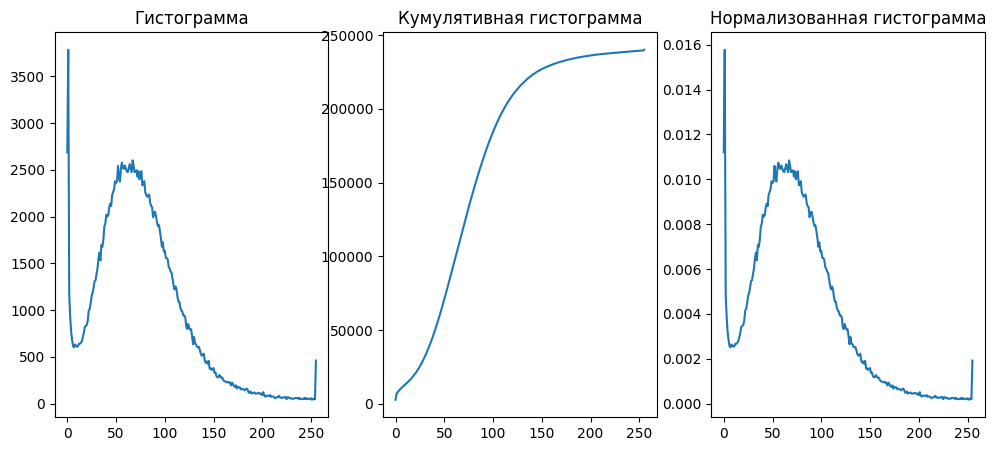

3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
 
4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
 


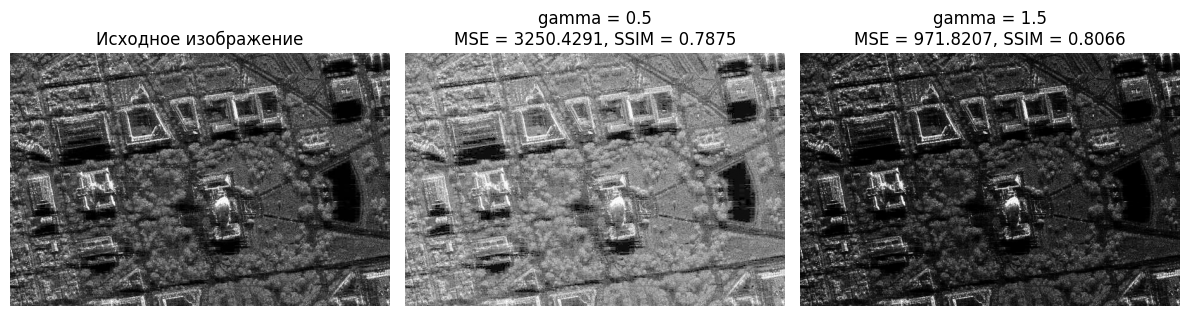

 
5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
 


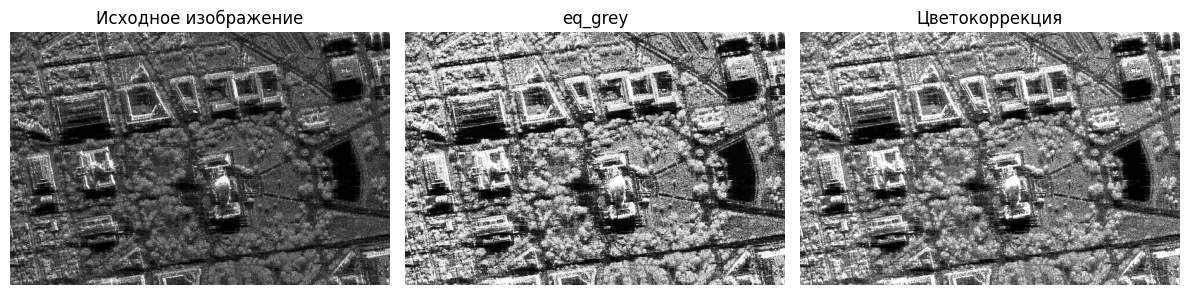

 
6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
 


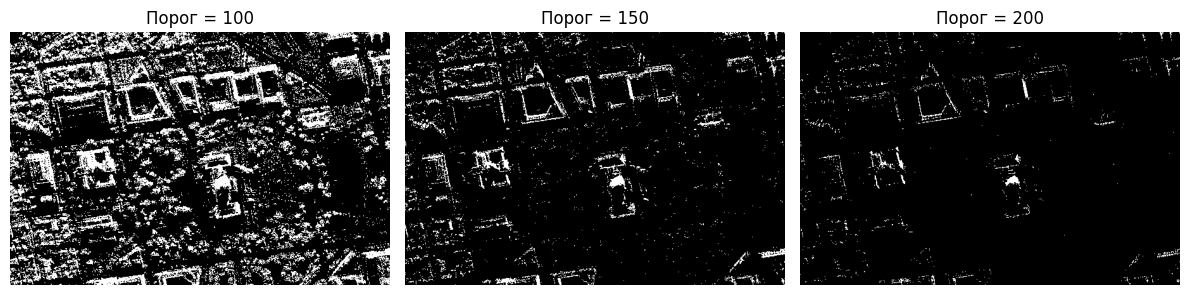

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from skimage.metrics import structural_similarity


print("ЗАДАНИЕ ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #1")
print(" ")

###1 ЗАДАНИЕ : Загрузите изображение в оттенках серого sar_1_gray.jpg
print("1. Загрузите изображение в оттенках серого sar_1_gray.jpg")
print(" ")
image = cv2.imread('sar_1_gray.jpg')   # Загружаем изображение
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Отображаем в блокноте
plt.figure(figsize=(8, 3))
plt.imshow(image_grey, cmap='gray')
plt.axis("off")
plt.show()
print(" ")
print(" ")

print("2. Постройте гистограмму")
print(" ")
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)
b_hist_cum = b_hist.cumsum()
b_hist_norm = b_hist / (image.shape[0] * image.shape[1])

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("Гистограмма")
plt.plot(b_hist)
plt.subplot(1, 3, 2)
plt.title("Кумулятивная гистограмма")
plt.plot(b_hist_cum)
plt.subplot(1, 3, 3)
plt.title("Нормализованная гистограмма")
plt.plot(b_hist_norm)

plt.show()

print("3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.")
print(" ")
def gamma_correction(image_, gamma):
    image_template = image_ / 255
    gamma_corrected = image_template ** gamma
    return np.uint8(gamma_corrected * 255)

gamma_05 = gamma_correction(image_grey, gamma=0.5)
gamma_15 = gamma_correction(image_grey, gamma=1.5)



print("4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.")
print(" ")

mse_05= mean_squared_error(image_grey, gamma_05)
mse_15 = mean_squared_error(image_grey, gamma_15)


ssim_05 = structural_similarity(image_grey, gamma_05)
ssim_15 = structural_similarity(image_grey, gamma_15)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Исходное изображение')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(gamma_05, cmap='gray')
plt.title(f'gamma = 0.5\nMSE = {mse_05:.4f}, SSIM = {ssim_05:.4f}')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(gamma_15, cmap='gray')
plt.title(f'gamma = 1.5\nMSE = {mse_15:.4f}, SSIM = {ssim_15:.4f}')
plt.axis('off')

plt.tight_layout()
plt.show()
print(" ")

print("5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.")
print(" ")

mean = image_grey.mean()
std = image_grey.std()

eq_gray = cv2.equalizeHist(image_grey)
mean_eq = eq_gray.mean()
std_eq = eq_gray.std()

corrected_image = image_grey.astype(np.float32)

corrected_image = mean_eq + (corrected_image - mean) * (std_eq / std)
corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)

mean_res = corrected_image.mean()
std_res = corrected_image.std()

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Исходное изображение')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('eq_grey')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(corrected_image, cmap='gray')
plt.title('Цветокоррекция')
plt.axis('off')

plt.tight_layout()
plt.show()
print(" ")

print("6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.")
print(" ")

_, thresh1 = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
_, thresh3 = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(thresh1, cmap='gray')
plt.title('Порог = 100')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresh2, cmap='gray')
plt.title('Порог = 150')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thresh3, cmap='gray')
plt.title('Порог = 200')
plt.axis('off')

plt.tight_layout()
plt.show()
